In [1]:
import pandas as pd
pd.options.display.max_rows = 1000

import pickle

import numpy as np

import re
import string

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')

In [2]:
def print_nulls(df):
    print df.isnull().sum()/len(df)*100

In [3]:
def plt_vals(df):
    df.value_counts().plot(kind='bar');

In [4]:
files_airbnb = !ls ../data/external/airbnb/*.csv

In [5]:
files_airbnb

['../data/external/airbnb/asheville.listings.csv',
 '../data/external/airbnb/austin.listings.csv',
 '../data/external/airbnb/boston.listings.csv',
 '../data/external/airbnb/chicago.listings.csv',
 '../data/external/airbnb/denver.listings.csv',
 '../data/external/airbnb/losangeles.listings.csv',
 '../data/external/airbnb/nashville.listings.csv',
 '../data/external/airbnb/neworleans.listings.csv',
 '../data/external/airbnb/newyorkcity.listings.csv',
 '../data/external/airbnb/oakland.listings.csv',
 '../data/external/airbnb/portland.listings.csv',
 '../data/external/airbnb/sandiego.listings.csv',
 '../data/external/airbnb/sanfrancisco.listings.csv',
 '../data/external/airbnb/santacruz.listings.csv',
 '../data/external/airbnb/seattle.listings.csv',
 '../data/external/airbnb/washingtondc.listings.csv']

In [6]:
#create dataframe of all listings for all cities
df_master = pd.DataFrame()
for filename in files_airbnb:
    city = re.findall('external/airbnb/([A-Za-z]+).', filename)[0]
    print city
    df_city = pd.read_csv(filename)
    df_city['city'] = city
    df_master = df_master.append(df_city, ignore_index=True)

asheville
austin
boston
chicago
denver
losangeles


/Users/evaward/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


nashville
neworleans
newyorkcity
oakland
portland
sandiego
sanfrancisco
santacruz
seattle
washingtondc


In [7]:
len(df_master)

120694

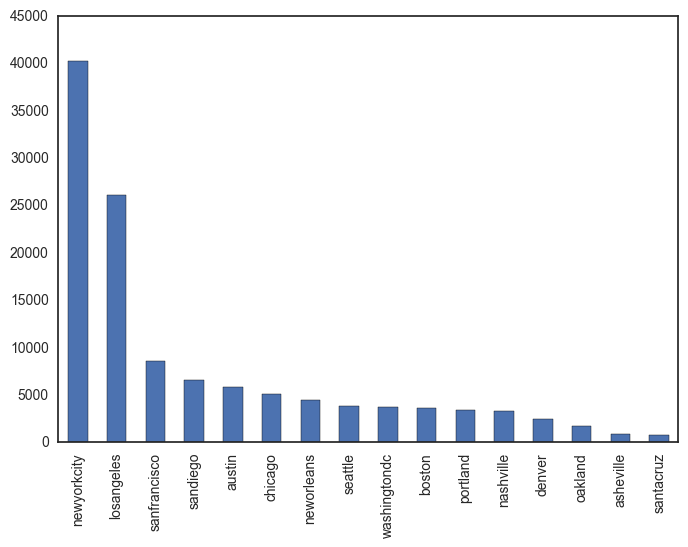

In [8]:
plt_vals(df_master['city'])

In [9]:
print_nulls(df_master)

access                              50.437470
accommodates                         0.050541
amenities                            0.000000
availability_30                      0.000000
availability_365                     0.000000
availability_60                      0.000000
availability_90                      0.000000
bathrooms                            0.446584
bed_type                             0.000000
bedrooms                             0.135052
beds                                 0.177308
calculated_host_listings_count       0.715860
calendar_last_scraped                0.000000
calendar_updated                     0.000000
cancellation_policy                  0.000000
city                                 0.000000
cleaning_fee                        28.692396
country                              0.000829
country_code                         0.000000
description                          0.022371
experiences_offered                  0.000000
extra_people                      

In [10]:
host_cols = ['host_is_superhost', 'host_response_time', 'cancellation_policy']

property_cols = ['bathrooms', 'room_type', 'number_of_reviews', 'reviews_per_month', \
                 'property_type', 'bed_type', 'accommodates']

score_cols = ['review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', \
              'review_scores_communication', 'review_scores_location', 'review_scores_rating', \
              'review_scores_value']

loc_cols = ['neighborhood_overview', 'city', 'latitude', 'longitude']

keep_cols = ['id', 'listing_url', 'price'] + host_cols + property_cols + score_cols + loc_cols

In [11]:
df_listings = df_master[keep_cols]
print_nulls(df_listings)

id                              0.000000
listing_url                     0.000000
price                           0.000000
host_is_superhost               0.045570
host_response_time             18.852636
cancellation_policy             0.000000
bathrooms                       0.446584
room_type                       0.000000
number_of_reviews               0.000000
reviews_per_month              22.605929
property_type                   0.007457
bed_type                        0.000000
accommodates                    0.050541
review_scores_accuracy         24.191758
review_scores_checkin          24.263841
review_scores_cleanliness      24.149502
review_scores_communication    24.120503
review_scores_location         24.242299
review_scores_rating           23.989594
review_scores_value            24.249756
neighborhood_overview          38.001061
city                            0.000000
latitude                        0.000000
longitude                       0.000000
dtype: float64


In [12]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120694 entries, 0 to 120693
Data columns (total 24 columns):
id                             120694 non-null int64
listing_url                    120694 non-null object
price                          120694 non-null object
host_is_superhost              120639 non-null object
host_response_time             97940 non-null object
cancellation_policy            120694 non-null object
bathrooms                      120155 non-null float64
room_type                      120694 non-null object
number_of_reviews              120694 non-null int64
reviews_per_month              93410 non-null float64
property_type                  120685 non-null object
bed_type                       120694 non-null object
accommodates                   120633 non-null float64
review_scores_accuracy         91496 non-null float64
review_scores_checkin          91409 non-null float64
review_scores_cleanliness      91547 non-null float64
review_scores_communicatio

#### Convert price to numeric value

In [13]:
df_listings.price.describe()

count      120694
unique        991
top       $150.00
freq         4699
Name: price, dtype: object

In [14]:
df_listings['price'].fillna('$0.00', inplace=True)
df_listings['price'] = df_listings['price'].map(lambda x: re.findall('^\$([0-9]+).', x)[0])
df_listings['price'] = pd.to_numeric(df_listings['price'])
df_listings.loc[df_listings['price']==0, 'price'] = df_listings['price'].median()

/Users/evaward/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/evaward/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/evaward/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [15]:
df_listings.price.describe()

count    120694.000000
mean        152.684558
std         129.828971
min           1.000000
25%          75.000000
50%         115.000000
75%         185.000000
max         999.000000
Name: price, dtype: float64

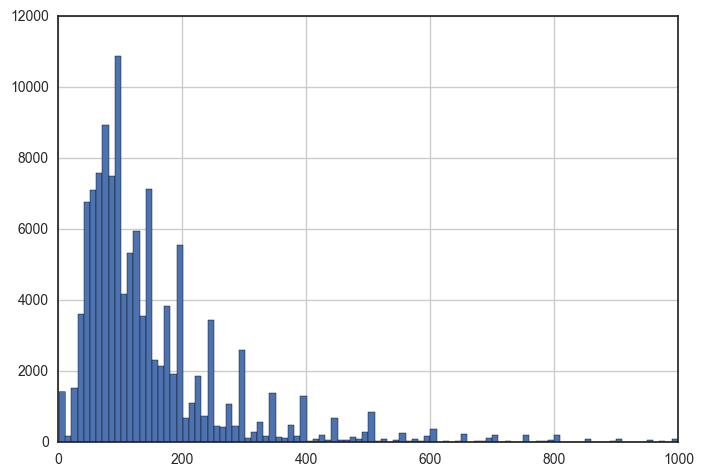

In [16]:
df_listings['price'].hist(bins=100);

#### Add neighborhoods from 01_assign_neighborhoods

In [17]:
with open('../data/interim/01_neighborhoods.pkl', 'rb') as picklefile:
    df_neighborhoods = pickle.load(picklefile)

In [18]:
df_neighborhoods['id'] = pd.to_numeric(df_neighborhoods['id'])

In [19]:
df_merged = df_listings.merge(df_neighborhoods[['id', 'Name', 'State']], on='id')
df_merged = df_merged.rename(columns={'Name': 'neighborhood',
                                      'State': 'state'})

#### Fill NA values

In [20]:
def desc_null(df, bins=10):
    print df.describe()
    print
    print 'missing {} values, {}%'.format(df.isnull().sum(), round(100*float(df.isnull().sum())/len(df)))
    if np.dtype(df) == 'object':
        plt_vals(df)
    else:
        df.hist(bins=bins)

In [21]:
print_nulls(df_merged)

id                              0.000000
listing_url                     0.000000
price                           0.000000
host_is_superhost               0.046084
host_response_time             19.012786
cancellation_policy             0.000000
bathrooms                       0.448276
room_type                       0.000000
number_of_reviews               0.000000
reviews_per_month              22.718818
property_type                   0.007541
bed_type                        0.000000
accommodates                    0.051112
review_scores_accuracy         24.327585
review_scores_checkin          24.400483
review_scores_cleanliness      24.284852
review_scores_communication    24.256364
review_scores_location         24.376184
review_scores_rating           24.122300
review_scores_value            24.385400
neighborhood_overview          38.179746
city                            0.000000
latitude                        0.000000
longitude                       0.000000
neighborhood    

count    90312.000000
mean         9.564731
std          0.812597
min          2.000000
25%               NaN
50%               NaN
75%               NaN
max         10.000000
Name: review_scores_accuracy, dtype: float64

missing 29034 values, 24.0%


/Users/evaward/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


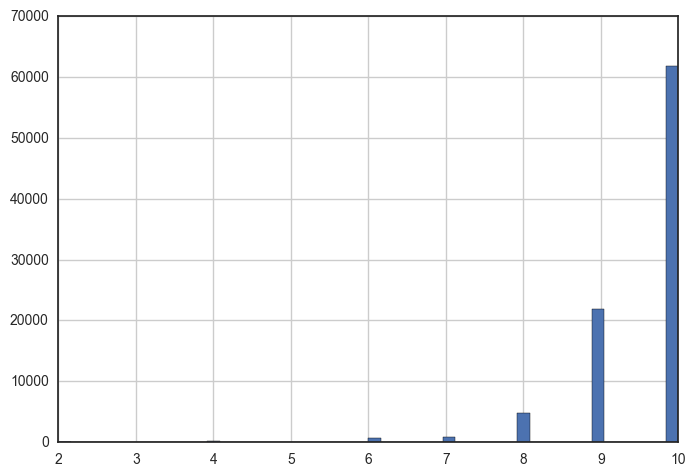

In [22]:
desc_null(df_merged['review_scores_accuracy'], bins=50)

In [23]:
#drop missing review scores for now
#for later: investigate how to impute
df_merged.dropna(subset=score_cols, inplace=True)
df_merged.reset_index(inplace=True)

In [24]:
print_nulls(df_merged)

index                           0.000000
id                              0.000000
listing_url                     0.000000
price                           0.000000
host_is_superhost               0.035514
host_response_time             11.236890
cancellation_policy             0.000000
bathrooms                       0.430609
room_type                       0.000000
number_of_reviews               0.000000
reviews_per_month               0.000000
property_type                   0.004439
bed_type                        0.000000
accommodates                    0.061040
review_scores_accuracy          0.000000
review_scores_checkin           0.000000
review_scores_cleanliness       0.000000
review_scores_communication     0.000000
review_scores_location          0.000000
review_scores_rating            0.000000
review_scores_value             0.000000
neighborhood_overview          31.770712
city                            0.000000
latitude                        0.000000
longitude       

In [25]:
#fill missing neighborhood overviews with empty string
df_merged['neighborhood_overview'].fillna('', inplace=True)

In [26]:
#fill missing bathrooms, superhosts, property types, and accommodates with mode
for column in ['bathrooms', 'host_is_superhost', 'property_type', 'accommodates']:
    df_merged[column].fillna(df_merged[column].mode()[0], inplace=True)

In [27]:
#fill missing host response time data with "no response"
df_merged['host_response_time'].fillna('no response', inplace=True)

In [28]:
print_nulls(df_merged)

index                          0.0
id                             0.0
listing_url                    0.0
price                          0.0
host_is_superhost              0.0
host_response_time             0.0
cancellation_policy            0.0
bathrooms                      0.0
room_type                      0.0
number_of_reviews              0.0
reviews_per_month              0.0
property_type                  0.0
bed_type                       0.0
accommodates                   0.0
review_scores_accuracy         0.0
review_scores_checkin          0.0
review_scores_cleanliness      0.0
review_scores_communication    0.0
review_scores_location         0.0
review_scores_rating           0.0
review_scores_value            0.0
neighborhood_overview          0.0
city                           0.0
latitude                       0.0
longitude                      0.0
neighborhood                   0.0
state                          0.0
dtype: float64


In [29]:
len(df_merged)

90105

#### Create price per person

In [30]:
df_merged['price_person'] = df_merged['price']/df_merged['accommodates']

#### Pickle cleaned dataframe

In [31]:
with open('../data/interim/02_cleaned.pkl', 'wb') as picklefile:
    pickle.dump(df_merged, picklefile)